In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv("2023-09-20T17-10-05.263Z-canada_per_capita_income.csv")
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes


In [39]:
df.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


In [40]:
X = df.iloc[:,:1]

In [41]:
X

,year
0,1970
1,1971
2,1972
3,1973
4,1974
5,1975
6,1976
7,1977
8,1978
9,1979


In [42]:
Y = df.drop("year", axis = "columns")
Y

,per capita income (US$)
0,3399.299037
1,3768.297935
2,4251.175484
3,4804.463248
4,5576.514583
5,5998.144346
6,7062.131392
7,7100.126170
8,7247.967035
9,7602.912681


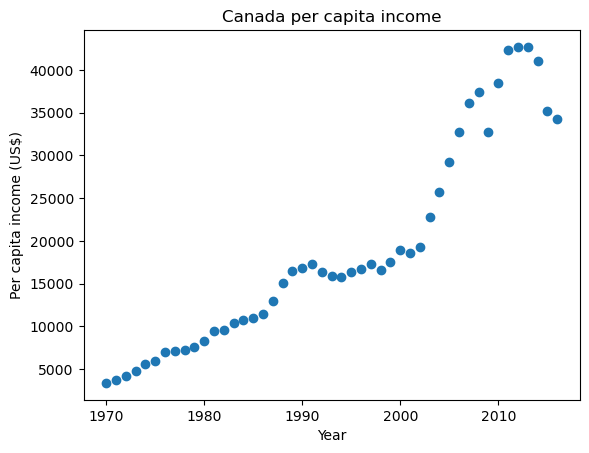

In [43]:
plt.scatter(X, Y)
plt.xlabel("Year")
plt.ylabel("Per capita income (US$)")
plt.title("Canada per capita income")
plt.show()

In [44]:
df.isnull().sum()

year                       0
per capita income (US$)    0
dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=123)

In [46]:
X_train.shape

(37, 1)

In [47]:
Y_train.shape

(37, 1)

In [48]:
X_test

,year
8,1978
11,1981
44,2014
18,1988
43,2013
31,2001
42,2012
10,1980
5,1975
1,1971


In [49]:
X_test.shape

(10, 1)

In [50]:
Y_test

,per capita income (US$)
8,7247.967035
11,9434.390652
44,41039.893600
18,15080.283450
43,42676.468370
31,18601.397240
42,42665.255970
10,8355.968120
5,5998.144346
1,3768.297935


In [51]:
Y_test.shape

(10, 1)

In [52]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [53]:
model = lr.fit(X_train, Y_train)

In [54]:
model.coef_

array([[794.16778015]])

In [55]:
model.intercept_

array([-1564374.29061476])

In [56]:
y_pred  = model.predict(X_test)
y_pred

array([[ 6489.57851401],
       [ 8872.08185445],
       [35079.61859927],
       [14431.25631547],
       [34285.45081912],
       [24755.43745737],
       [33491.28303898],
       [ 8077.91407431],
       [ 4107.07517358],
       [  930.40405299]])

In [57]:
import numpy as np
pd.DataFrame(np.c_[X_test, Y_test, y_pred], columns = ["year", "per capita income (US$) original","per capita income (US$) predicted"])

,year,per capita income (US$) original,per capita income (US$) predicted
0,1978.0,7247.967035,6489.578514
1,1981.0,9434.390652,8872.081854
2,2014.0,41039.893600,35079.618599
3,1988.0,15080.283450,14431.256315
4,2013.0,42676.468370,34285.450819
5,2001.0,18601.397240,24755.437457
6,2012.0,42665.255970,33491.283039
7,1980.0,8355.968120,8077.914074
8,1975.0,5998.144346,4107.075174
9,1971.0,3768.297935,930.404053


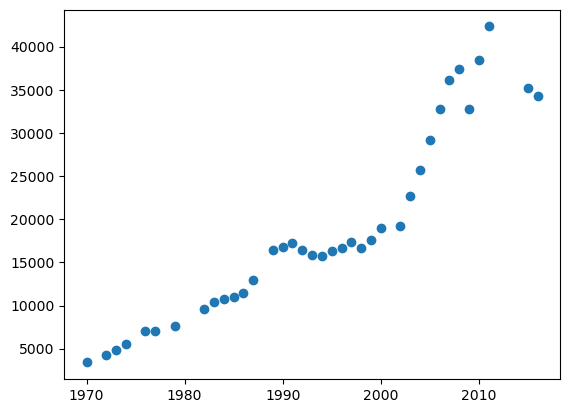

In [58]:
plt.scatter(X_train, Y_train)

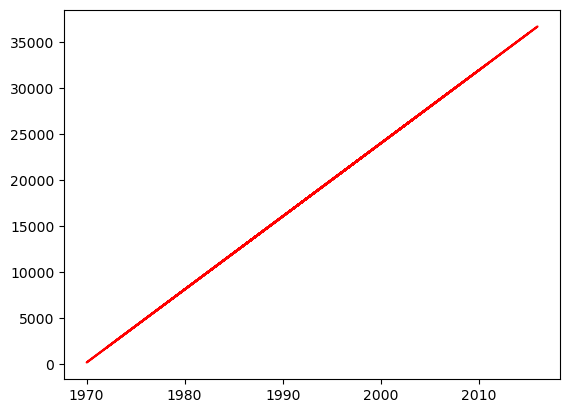

In [59]:
plt.plot(X_train, model.predict(X_train), color = "r")

In [60]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test,y_pred)
mse

24098772.286630735

In [61]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test,y_pred)
mae

3665.6047253191646

In [62]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, y_pred)
r2

0.8980373087821829